In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [2]:
df = pd.read_csv("./StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


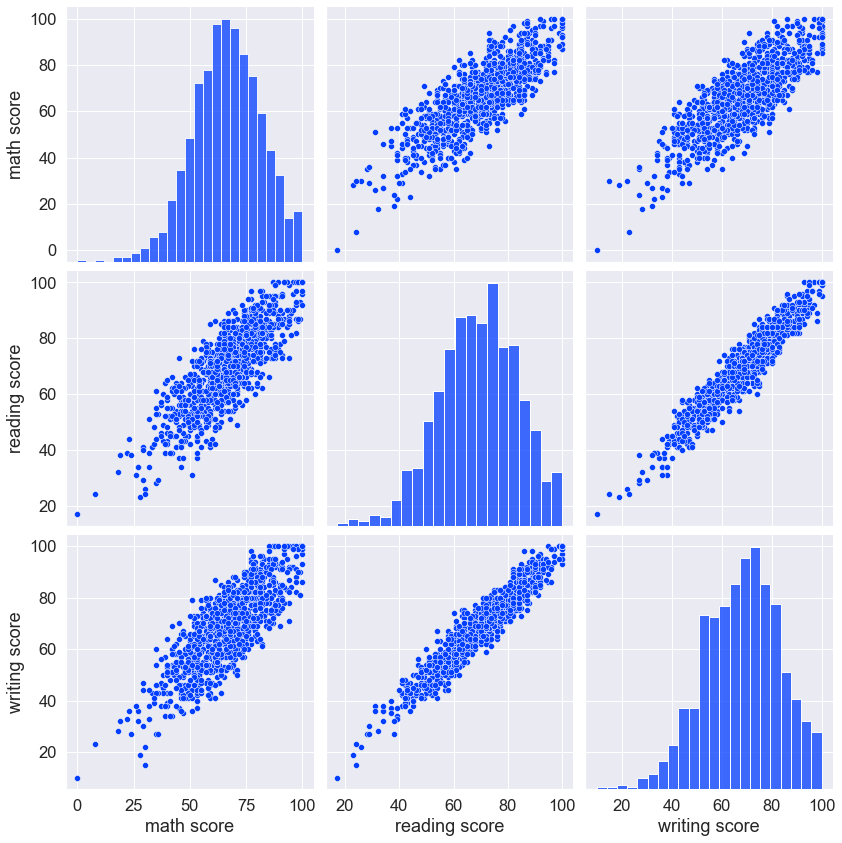

In [4]:
pair_plot=sns.pairplot(df[['math score', 'reading score', 'writing score']], height=4)
pair_plot.savefig("pair_plot.png")

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

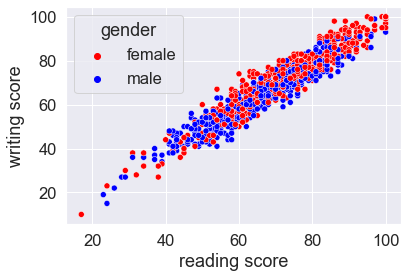

In [5]:
sns.scatterplot(x="reading score", y="writing score", hue="gender", data=df, palette=sns.color_palette(['red', 'blue']))

<AxesSubplot:xlabel='reading score', ylabel='math score'>

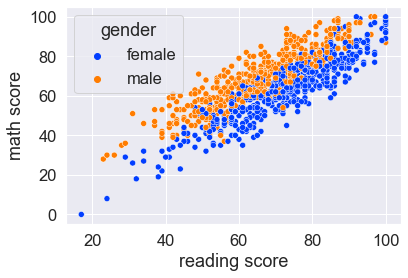

In [6]:
sns.scatterplot(x="reading score", y="math score", hue="gender", data=df)

In [7]:
def average_score(dt
                 ):
    return (dt['math score'] + dt['reading score'] + dt['writing score']) / 3

df['average score'] = df.apply(average_score, axis=1)

<AxesSubplot:xlabel='average score', ylabel='math score'>

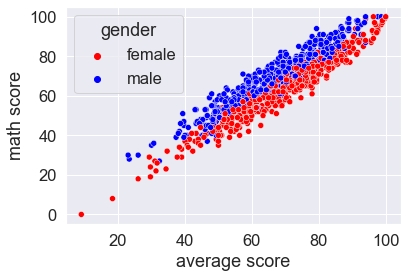

In [8]:
sns.scatterplot(x="average score", y="math score", hue="gender", data=df, palette=sns.color_palette(['red', 'blue']))

<AxesSubplot:xlabel='average score', ylabel='reading score'>

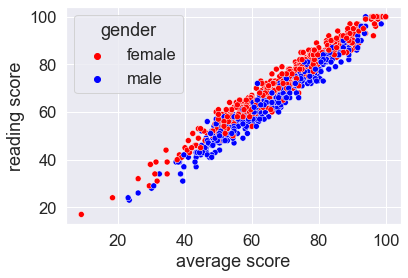

In [9]:
sns.scatterplot(x="average score", y="reading score", hue="gender", data=df, palette=sns.color_palette(['red', 'blue']))

<AxesSubplot:xlabel='average score', ylabel='writing score'>

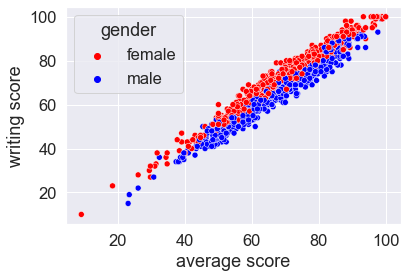

In [10]:
sns.scatterplot(x="average score", y="writing score", hue="gender", data=df, palette=sns.color_palette(['red', 'blue']))

# Compute Average Score

In [11]:
def average_score(dt
                 ):
    return (dt['math score'] + dt['reading score'] + dt['writing score']) / 3

df['average score'] = df.apply(average_score, axis=1)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


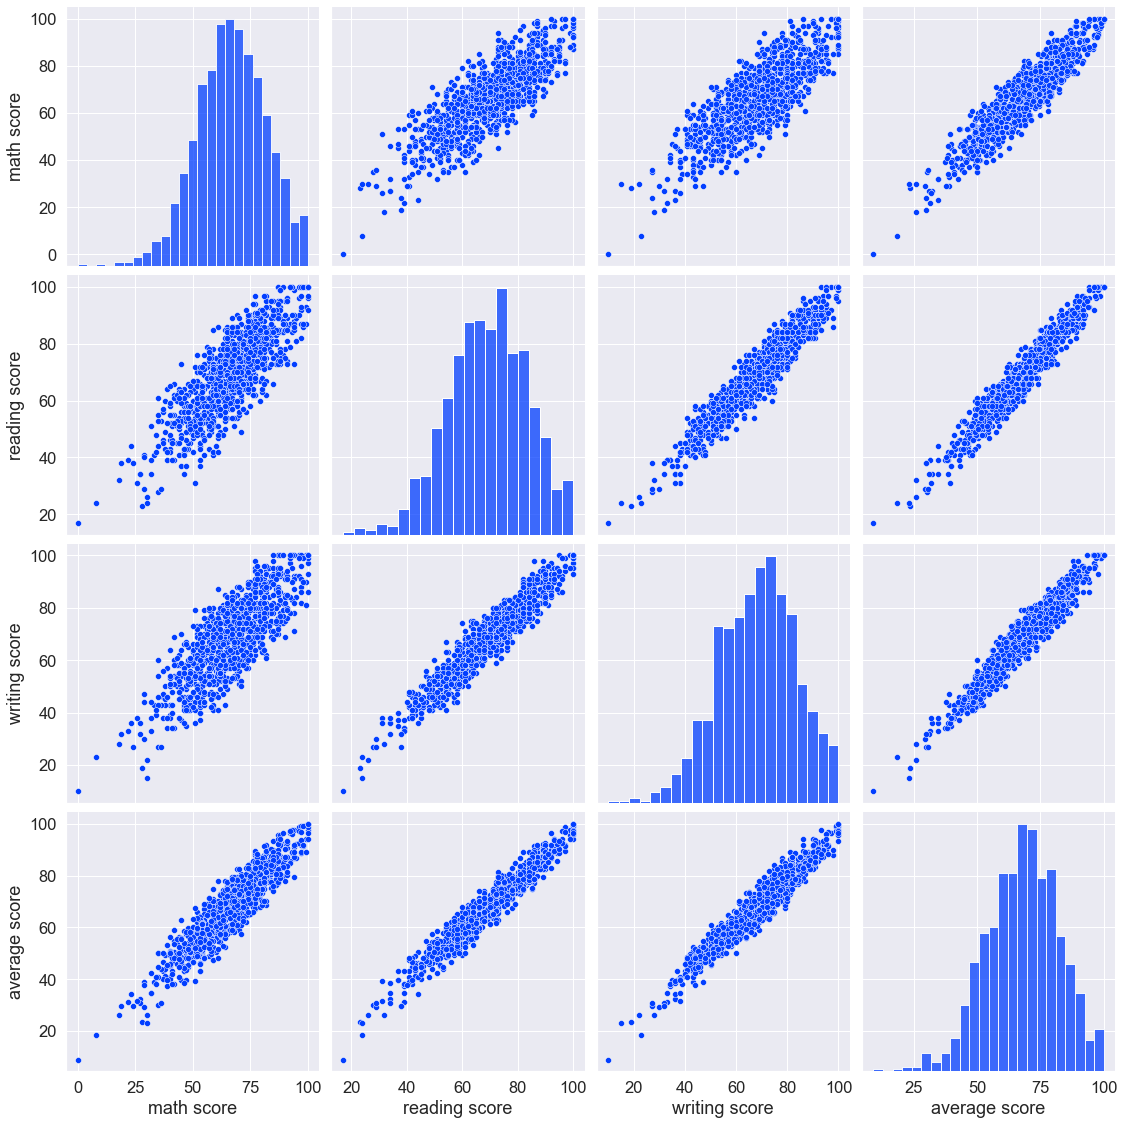

In [13]:
pair_plot=sns.pairplot(df[['math score', 'reading score', 'writing score', 'average score']], height=4)
pair_plot.savefig("pair_plot.png")

In [14]:
def race_to_num(i):
    if i=="group A":
        return 1
    if i=="group B":
        return 2
    if i=="group C":
        return 3
    if i=="group D":
        return 4
    if i =="group E":
        return 5


In [15]:
df['race_num']=df['race/ethnicity'].apply(race_to_num)

In [16]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,race_num
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,2
1,female,group C,some college,standard,completed,69,90,88,82.333333,3
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,male,group C,some college,standard,none,76,78,75,76.333333,3
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,2
6,female,group B,some college,standard,completed,88,95,92,91.666667,2
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,2
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,4
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,2


In [17]:
def education_to_numeric(x):
    if x=="bachelor's degree":
        return 5
    if x=='some college':
        return 4
    if x=="master's degree":
        return 6
    if x=="associate's degree":
        return 3
    if x=="some high school":
        return 1
    if x=="high school":
        return 2
    

In [18]:
df['edu_num'] = df['parental level of education'].apply(education_to_numeric)

In [19]:
df.head(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,race_num,edu_num
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,2,5
1,female,group C,some college,standard,completed,69,90,88,82.333333,3,4
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,3
4,male,group C,some college,standard,none,76,78,75,76.333333,3,4
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,2,3
6,female,group B,some college,standard,completed,88,95,92,91.666667,2,4
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,2,4
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,4,2
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,2,2


In [21]:
#Distance plot : https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/


<AxesSubplot:>

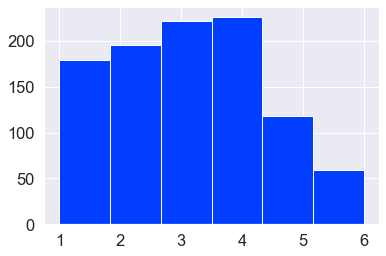

In [22]:
df.edu_num.hist(bins=6)

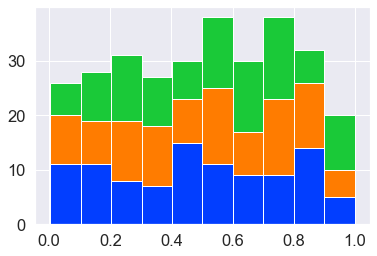

In [23]:
import numpy as np
import pylab as pl
x = np.random.rand(100,3)
pl.hist(x,stacked=True)
pl.show()

/usr/local/Cellar/jupyterlab/2.1.2/libexec/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/jupyterlab/2.1.2/libexec/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

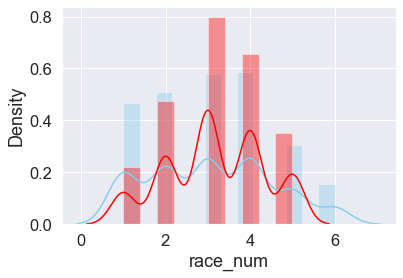

In [24]:
sns.distplot( df["edu_num"] , color="skyblue", label="Parental education")
sns.distplot( df["race_num"] , color="red", label="race/ethnicity")
sns.plt.legend()
sns.plt.show()


<AxesSubplot:>

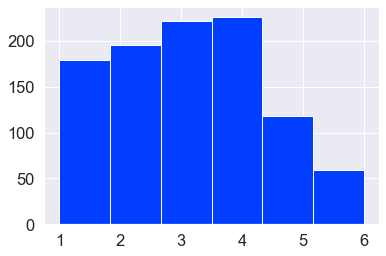

In [26]:
df.edu_num.hist(bins=6)

# Lunch

Text(0.5, 1.0, 'writing')

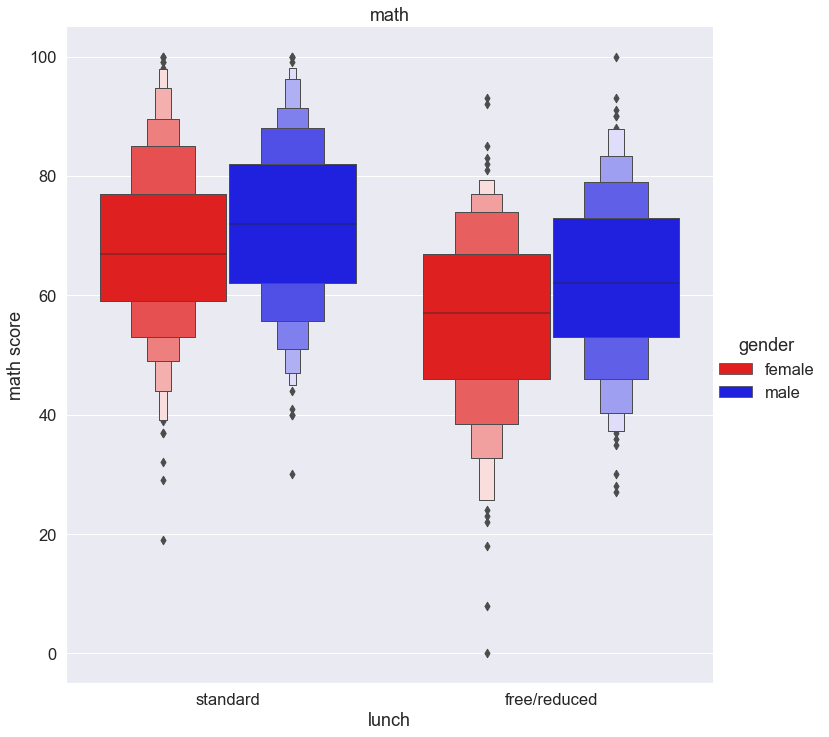

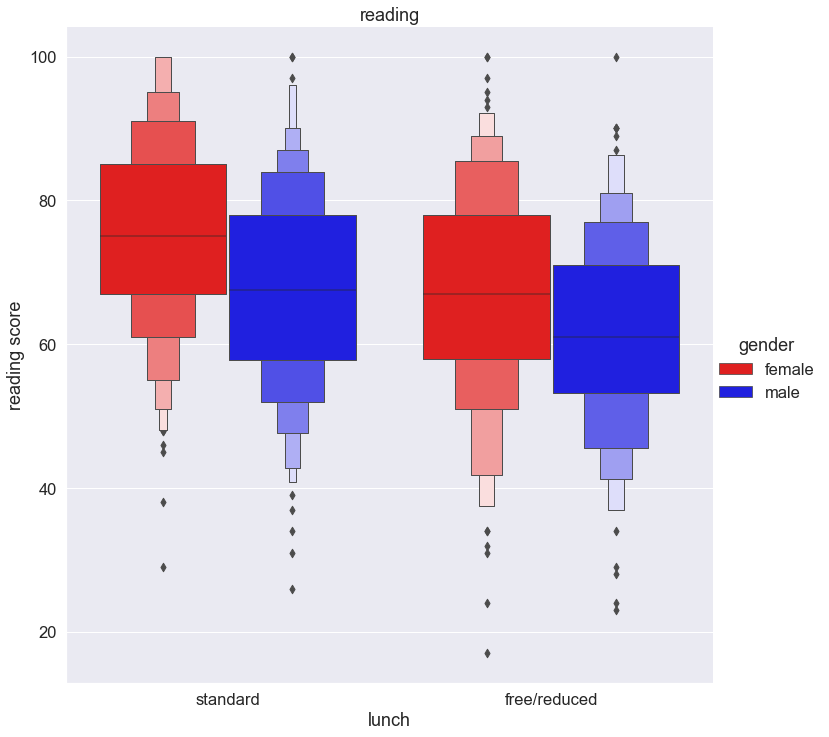

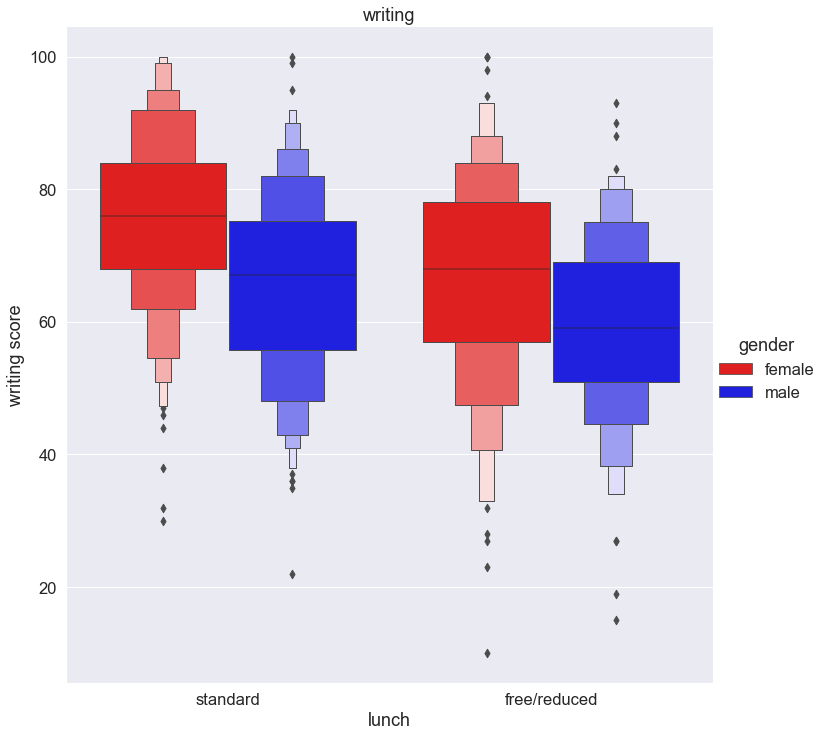

In [28]:
sns.catplot(x='lunch', y='math score', hue='gender', kind='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('math')

sns.catplot(x='lunch', y='reading score', hue='gender', kind='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('reading')

sns.catplot(x='lunch', y='writing score', hue='gender', kind='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('writing')

# Lunch and Aveage Score

Text(0.5, 1.0, 'average')

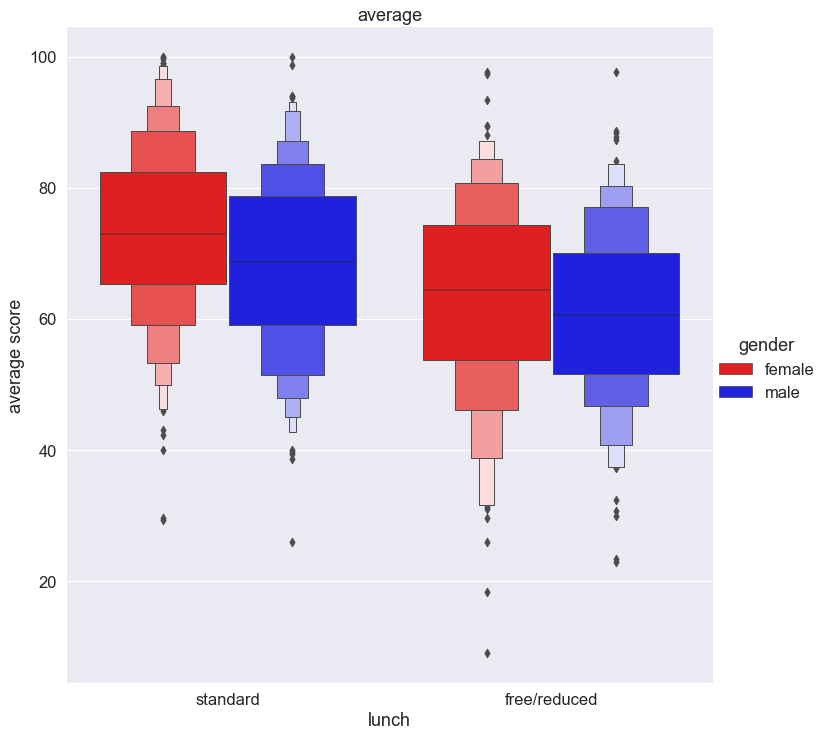

In [29]:
sns.catplot(x='lunch', y='average score', hue='gender', kind='boxen', data=df, height=10, palette=sns.color_palette(['red', 'blue']))
plt.title('average')

# Parental Level of Education

In [37]:
#https://github.com/mwaskom/seaborn/issues/1517 >> catplot 
sns.catplot(x='edu_num', y='average score', kind='boxen', data=df, height=14, order=(ascending==True))
#order = titanic['class'].value_counts().index)https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
# order = df['categorical_var'].value_counts(ascending=True)


plt.title('average')
plt.legend(loc='lower right')


NameError: name 'ascending' is not defined

No handles with labels found to put in legend.


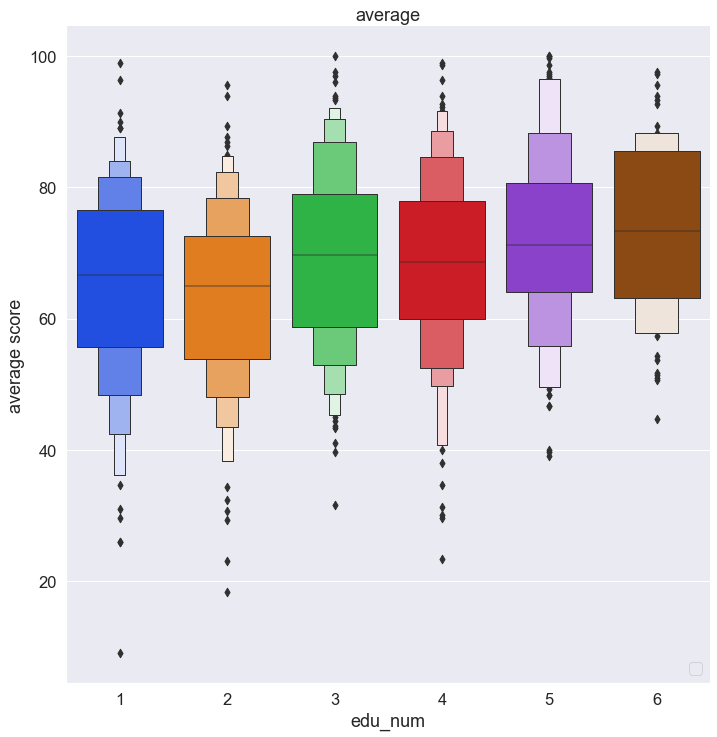

In [32]:
sns.catplot(x='edu_num', y='average score', kind='boxen', data=df, height=10)
plt.title('average')
plt.legend(loc='lower right')

No handles with labels found to put in legend.


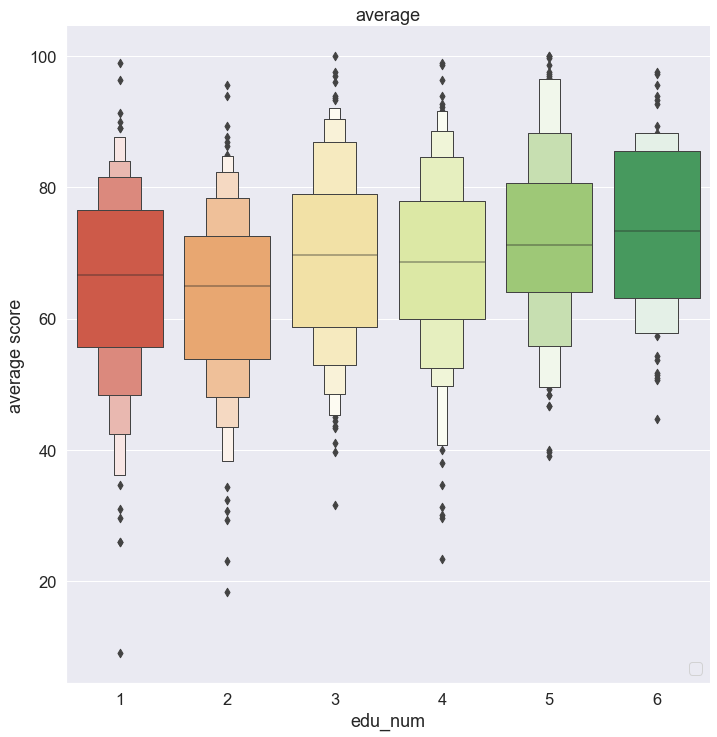

In [51]:
sns.catplot(x='edu_num', y='average score=['lunch'=='free']', kind='boxen', data=df, height=10, palette="RdYlGn") #sns.color_palette("RdBu", 10) #https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
plt.title('average')
plt.legend(loc='lower right')

In [52]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,race_num,edu_num
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,2,5
1,female,group C,some college,standard,completed,69,90,88,82.333333,3,4
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,3
4,male,group C,some college,standard,none,76,78,75,76.333333,3,4
